# A Landscape i

So, I want to try to play around with creating something along the lines of [Meridian by Matt DesLauriers](https://www.artblocks.io/collections/presents/projects/0xa7d8d9ef8d8ce8992df33d8b8cf4aebabd5bd270/163), where a "landscape" type vibe is create from textured rows.

In [1]:
import shades
import random

I'll start by just making a basic monochrome verion, and going from there

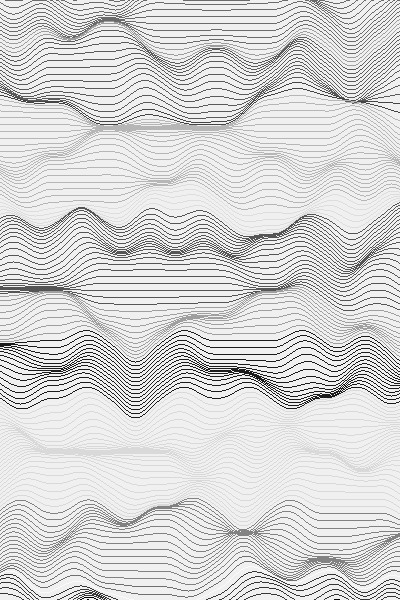

In [2]:
def landscape():
    canvas = shades.Canvas(600, 400)
    shade = shades.BlockColor(
        warp_noise=shades.noise_fields(
            scale=[0, random.uniform(0.015, 0.025)],  # <-- warping on y axis only
            channels=2,
        ),
        warp_size=40,
    )
    y = -50
    change_prob = random.uniform(0, 0.2)

    while y < canvas.height:
        shade.line(canvas, (0, y), (canvas.width, y), weight=1)
        y += 4
        if random.random() < change_prob:
            c = random.randint(0, 255)
            shade.color = (c, c, c)

    return canvas

landscape()

I think it'd be a lot more interesting if there was a *texture* of some though. I'm thinking, creating the lines out of circles would be a neat way to go.

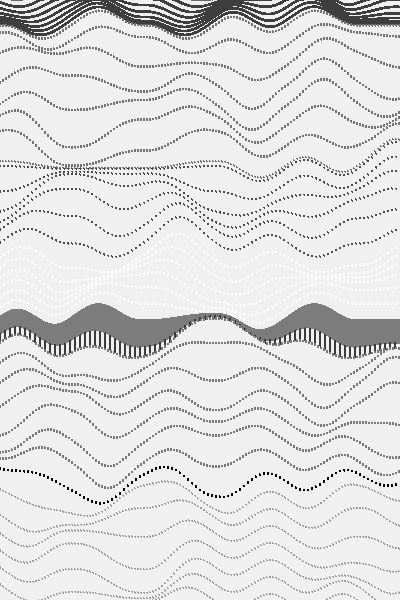

In [3]:
def landscape():
    canvas = shades.Canvas(600, 400)
    noise = shades.NoiseField(scale=random.uniform(0.007, 0.014))
    warp_size = random.randint(0, 100)
    tone = shades.BlockColor()
    
    y = -50
    change_prob = random.uniform(0.05, 0.4)
    
    c = random.randint(0, 255)
    tone.color = (c, c, c)
    y_spacing = random.randint(1, 10)
    x_spacing = random.randint(1, 10)
    radius = random.randint(1, 4)

    while y < canvas.height:
        for x in range(0, canvas.width, x_spacing):
            tone.circle(
                canvas,
                (x, y + noise.noise((x, y)) * warp_size),
                radius,
            )
        y += y_spacing
        if random.random() < change_prob:
            c = random.randint(0, 255)
            tone.color = (c, c, c)
            y_spacing = random.randint(1, 20)
            x_spacing = random.randint(1, 5)
            radius = random.uniform(0.5, 1)

    return canvas

landscape()

I like that in some ways, it has a kind of "braiding" effect. But I think it needs more complexity to be interesting.

I might try adding a secondary noise layer, and a background color for each.

In [4]:
def landscape():
    canvas = shades.Canvas(600, 400)
    noise = shades.NoiseField(scale=random.uniform(0.007, 0.014))
    secondary_noise = shades.NoiseField(scale=random.uniform(0.014, 0.021))
    warp_size = random.randint(0, 100)
    tone = shades.BlockColor()
    
    change_prob = random.uniform(0.05, 0.4)
    
    c = random.randint(0, 255)
    tone.color = (c, c, c)
    
    y_spacing = random.randint(1, 10)
    x_spacing = random.randint(1, 10)
    
    iterations = random.randint(3, 6)
    
    for i in range(iterations):
        y = -50
        while y < canvas.height:
            for x in range(0, canvas.width, x_spacing):
                point = (
                    x,
                    y +
                    (noise.noise((x, y)) * warp_size) +
                    (secondary_noise.noise((x, y)) * warp_size / 4),
                )
                tone.circle(canvas, point, 0.5)
            y += y_spacing
            if random.random() < change_prob:
                c = random.randint(0, 255)
                tone.color = (c, c, c)
                y_spacing = random.randint(1, 20)
                x_spacing = random.randint(1, 5)

    return canvas

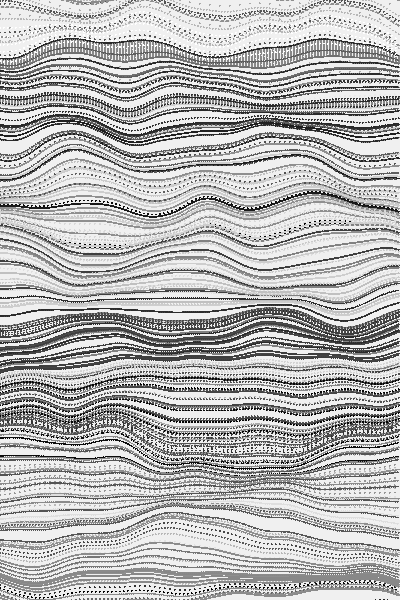

In [5]:
landscape()

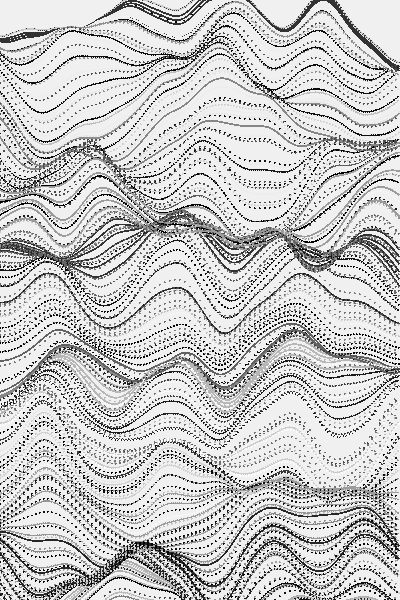

In [6]:
landscape()

I like those a lot more, they have a fabric texture to them. What do they look like in higher resolution? Maybe with some more variations around texture

In [7]:
def landscape():
    canvas = shades.Canvas(1200, 800)
    noise = shades.NoiseField(scale=0.014)
    secondary_noise = shades.NoiseField(scale=0.021)
    warp_size = random.randint(0, 100)
    tone = shades.BlockColor()
    
    iterations = random.randint(7, 14)

    for i in range(iterations):
        c = random.randint(0, 255)
        tone.color = (c, c, c)

        y_spacing = random.randint(5, 50)
        x_spacing = random.randint(5, 20)

        x_offset = random.randint(1, 6)
        y_offset = random.randint(1, 6)

        
        for y in range(-50, canvas.height+50):
            if y % y_spacing == 0:
                for x in range(0, canvas.width):
                    if x % x_spacing != 0:
                        continue
                    point = (
                        x + (noise.noise((x, y)) * warp_size/4),
                        y +
                        (noise.noise((x, y)) * warp_size) +
                        (secondary_noise.noise((x, y)) * warp_size / 4),
                    )
                    tone.line(canvas, point, (point[0] + x_offset, point[1] + y_offset), 1)
            if random.random() > 0.01:
                continue
            c = random.randint(0, 255)
            tone.color = (c, c, c)
            y_spacing = random.randint(5, 50)
            x_spacing = random.randint(5, 20)
            x_offset = random.randint(1, 6)
            y_offset = random.randint(1, 6)
            
    return canvas

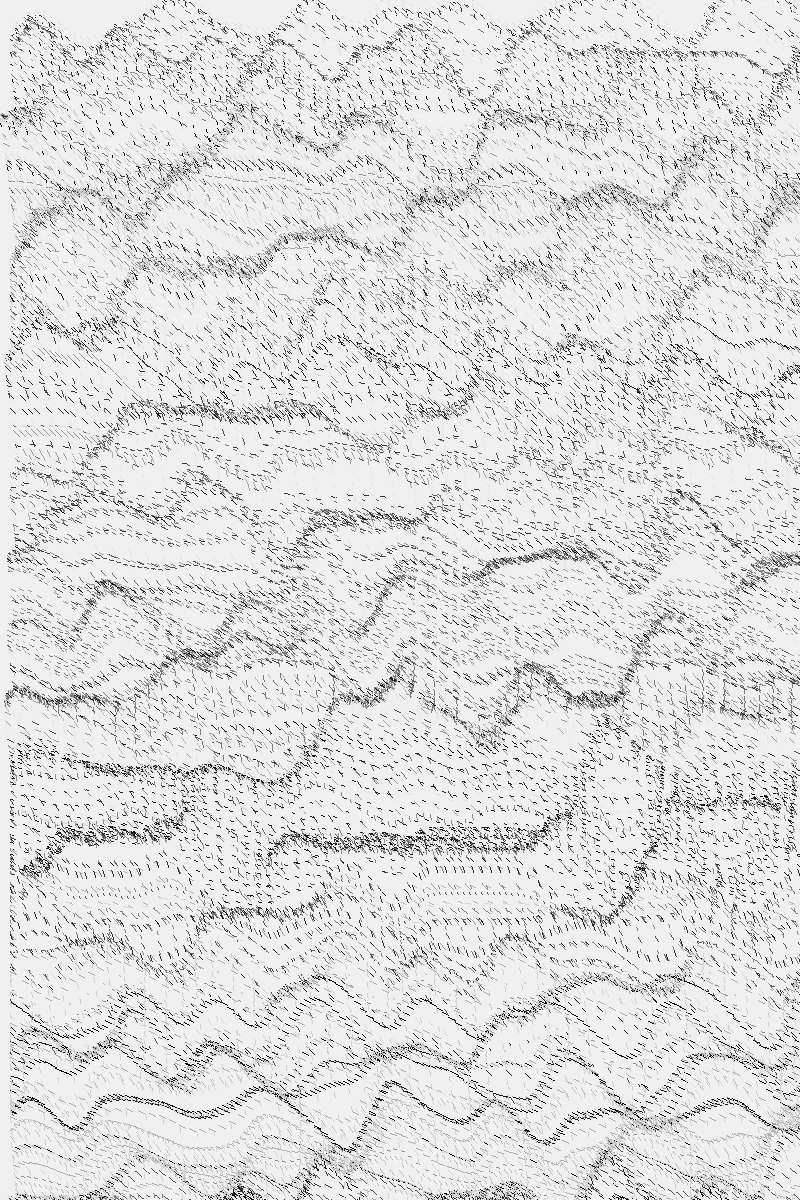

In [8]:
landscape()

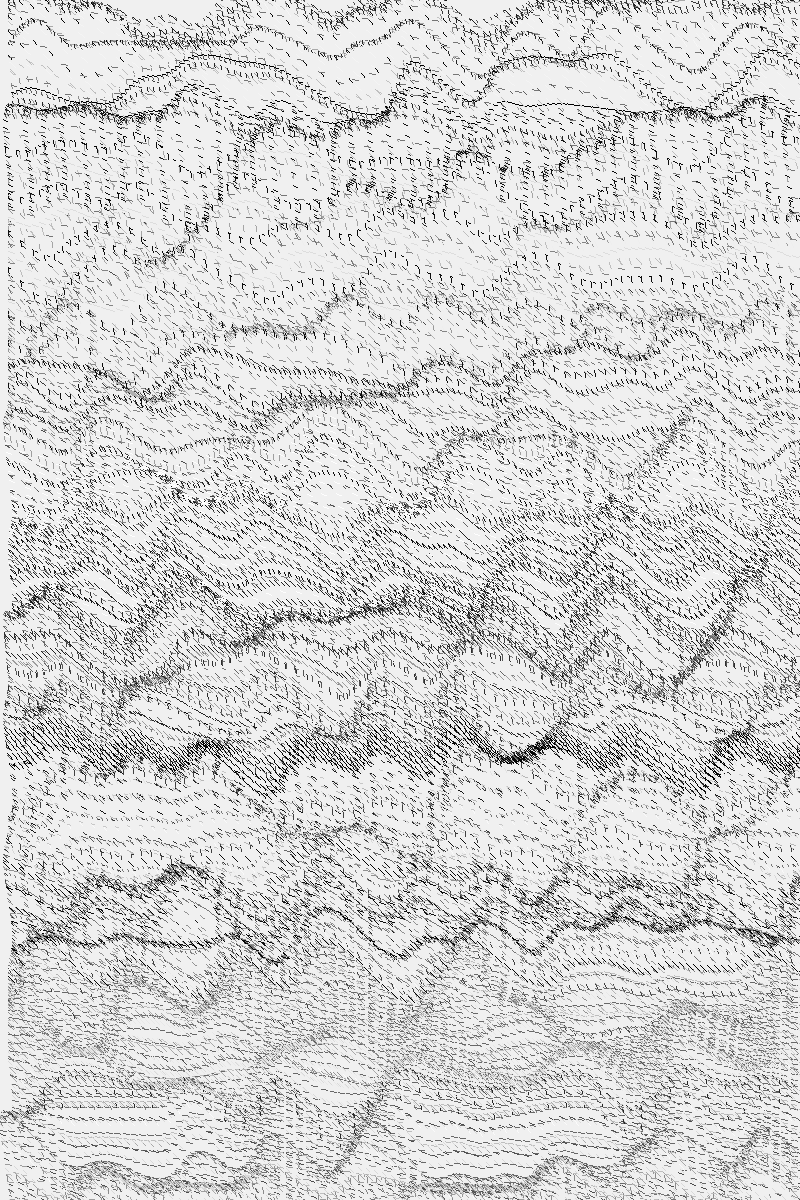

In [9]:
landscape()

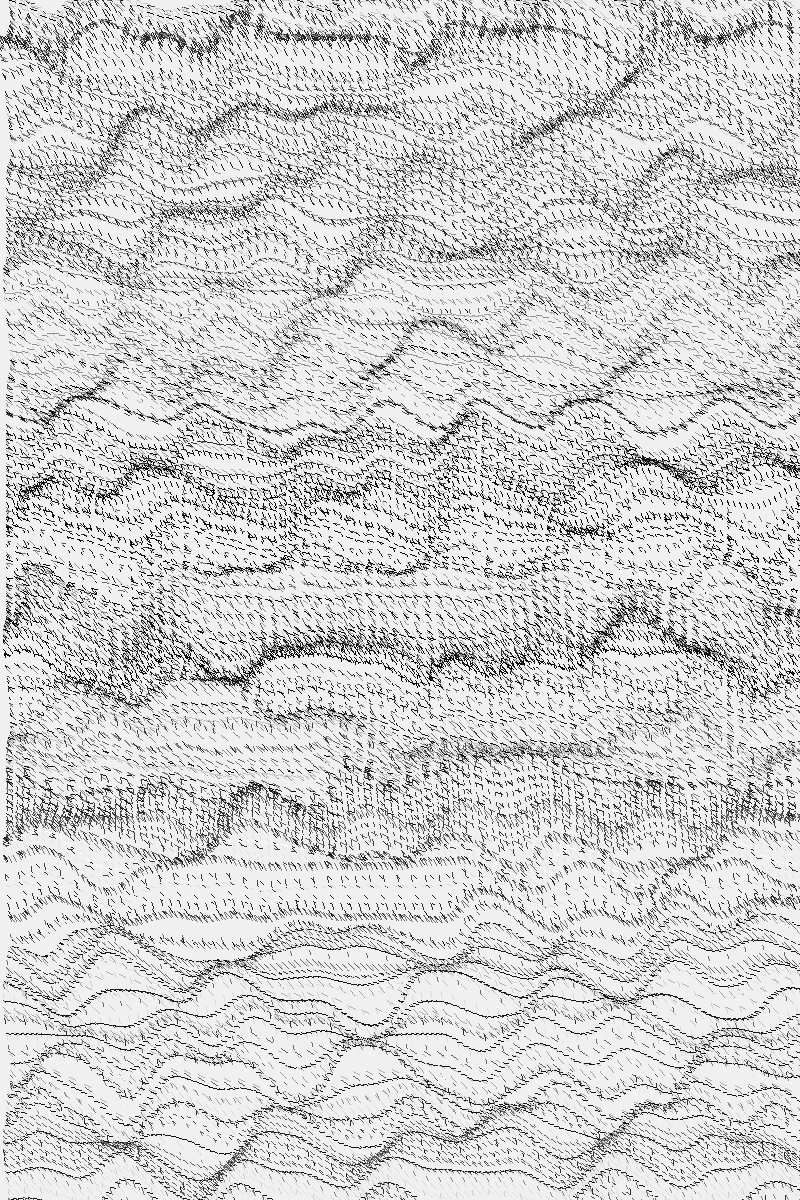

In [10]:
landscape()

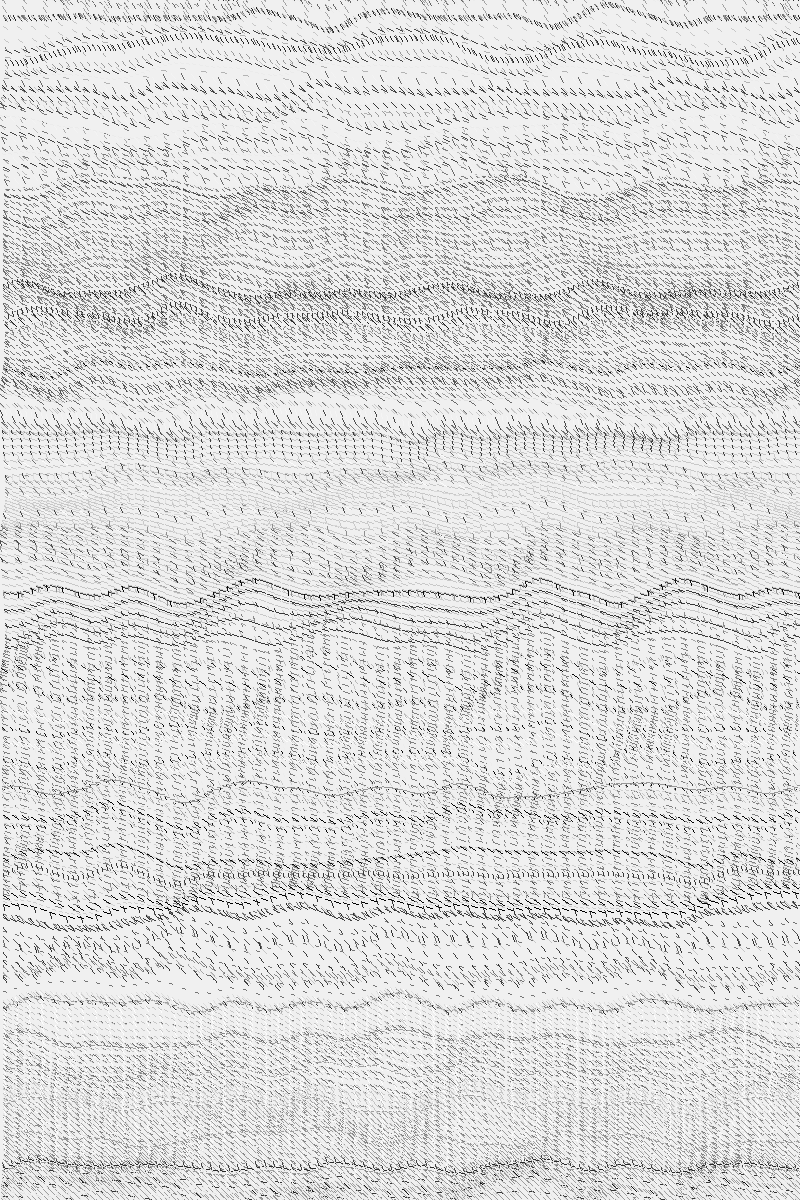

In [11]:
landscape()

I didn't expect it to wind up with the mechanical sense it gets from the straight lines, but I really like this aspect.